In [18]:
from __future__ import print_function
from enlib import enmap
from orphics import maps, cosmology, io
import numpy as np

In [4]:
# Fake geometry
resolution = 0.5
shape, wcs = maps.rect_geometry(width_deg=20.,px_res_arcmin=resolution)

In [5]:
print(shape)

(2400, 2400)


In [6]:
cc = cosmology.Cosmology(lmax=2000,pickling=True,dimensionless=False)
ells = np.arange(0,2000,1)
cltt = cc.theory.lCl('TT',ells)

Generating theory Cls...
Loaded cached Cls from  output/clsAll_2000_20171129.pkl
Loaded cached Cls from  output/clphi_2000_20171129.txt


In [7]:
ps = cltt.reshape((1,1,ells.size))
mg = maps.MapGen(shape,wcs,ps)

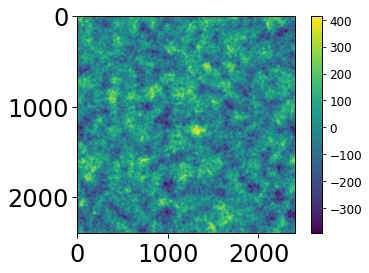

In [8]:
simulated_map = mg.get_map()
io.plot_img(simulated_map)


In [10]:
# fake catalog

bounds = simulated_map.box()
print(bounds*180./np.pi)

[[-10. -10.]
 [10. 10.]]


In [11]:
Nobj = 200
ras = np.random.uniform(-9,9,Nobj)*np.pi/180.
decs = np.random.uniform(-9,9,Nobj)*np.pi/180.


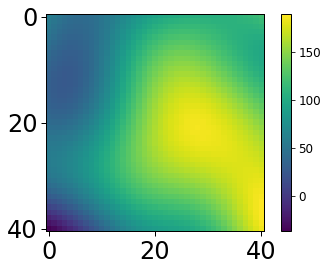

In [12]:
stamp = maps.cutout(simulated_map,ras[0],decs[0],arcmin_width=20.)
modrmap = stamp.modrmap()
io.plot_img(stamp)

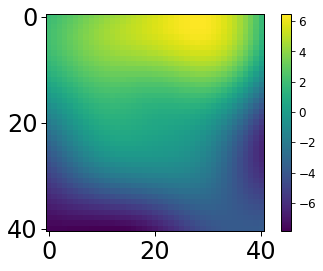

In [14]:
stamps = 0.
for k,(ra,dec) in enumerate(zip(ras,decs)):
    stamps += maps.cutout(simulated_map,ra,dec,arcmin_width=20.)
io.plot_img(stamps/k)

In [19]:
# aperture photometry

aperture_radius = 5.*np.pi/180./60.
annulus_width = 1. *np.pi/180./60.

flux = maps.aperture_photometry(stamps/k,aperture_radius,annulus_width)
print(flux)

286.460544552
